1. Descripción del Conjunto de Datos:


Breve descripción de cada conjunto de datos, incluyendo la fuente, el tamaño y las variables.

Fuente: https://www.kaggle.com/code/melikedilekci/diabetes-dataset-for-beginners/input

Tamaño: 23.88 kB

Este conjunto de datos es originalmente del Instituto Nacional de Diabetes y Enfermedades Digestivas y Renales. El objetivo del conjunto de datos es predecir diagnósticamente si un paciente tiene o no diabetes, en función de ciertas mediciones diagnósticas incluidas en el conjunto de datos. Se impusieron varias restricciones a la selección de estos casos de una base de datos más grande. En particular, todos los pacientes aquí son mujeres de al menos 21 años de edad de ascendencia indígena Pima.

2. Análisis Exploratorio de Datos (EDA) Inicial:
Realizar un EDA inicial para cada uno de los cuatro conjuntos de datos seleccionados.
Incluir visualizaciones, análisis estadístico descriptivo, identificación de valores nulos y outliers.
Documentar los hallazgos de cada EDA en un notebook de Jupyter.

In [ ]:
import pandas as pd
import numpy as np


url = 'https://drive.google.com/uc?id=1ZqE4HJpGVS38zS9rXEJCof8QM2VtfIjm&export=download'
df = pd.read_csv(url)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.845,120.895,69.105,20.536,79.799,31.993,0.472,33.241,0.349
std,3.370,31.973,19.356,15.952,115.244,7.884,0.331,11.760,0.477
min,0.000,0.000,0.000,0.000,0.000,0.000,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,17.000,199.000,122.000,99.000,846.000,67.100,2.420,81.000,1.000


In [ ]:
df.duplicated().sum()

0

In [ ]:
df.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


Revisión de datos atípicos.

In [ ]:
for columna in df.columns:
  print(f'Valores únicos en la columna {columna}:\n{df[columna].unique()}\n')

Valores únicos en la columna Pregnancies:
[ 6  1  8  0  5  3 10  2  4  7  9 11 13 15 17 12 14]

Valores únicos en la columna Glucose:
[148  85 183  89 137 116  78 115 197 125 110 168 139 189 166 100 118 107
 103 126  99 196 119 143 147  97 145 117 109 158  88  92 122 138 102  90
 111 180 133 106 171 159 146  71 105 101 176 150  73 187  84  44 141 114
  95 129  79   0  62 131 112 113  74  83 136  80 123  81 134 142 144  93
 163 151  96 155  76 160 124 162 132 120 173 170 128 108 154  57 156 153
 188 152 104  87  75 179 130 194 181 135 184 140 177 164  91 165  86 193
 191 161 167  77 182 157 178  61  98 127  82  72 172  94 175 195  68 186
 198 121  67 174 199  56 169 149  65 190]

Valores únicos en la columna BloodPressure:
[ 72  66  64  40  74  50   0  70  96  92  80  60  84  30  88  90  94  76
  82  75  58  78  68 110  56  62  85  86  48  44  65 108  55 122  54  52
  98 104  95  46 102 100  61  24  38 106 114]

Valores únicos en la columna SkinThickness:
[35 29  0 23 32 45 19 47 38 30 

Manejo de Outliers.

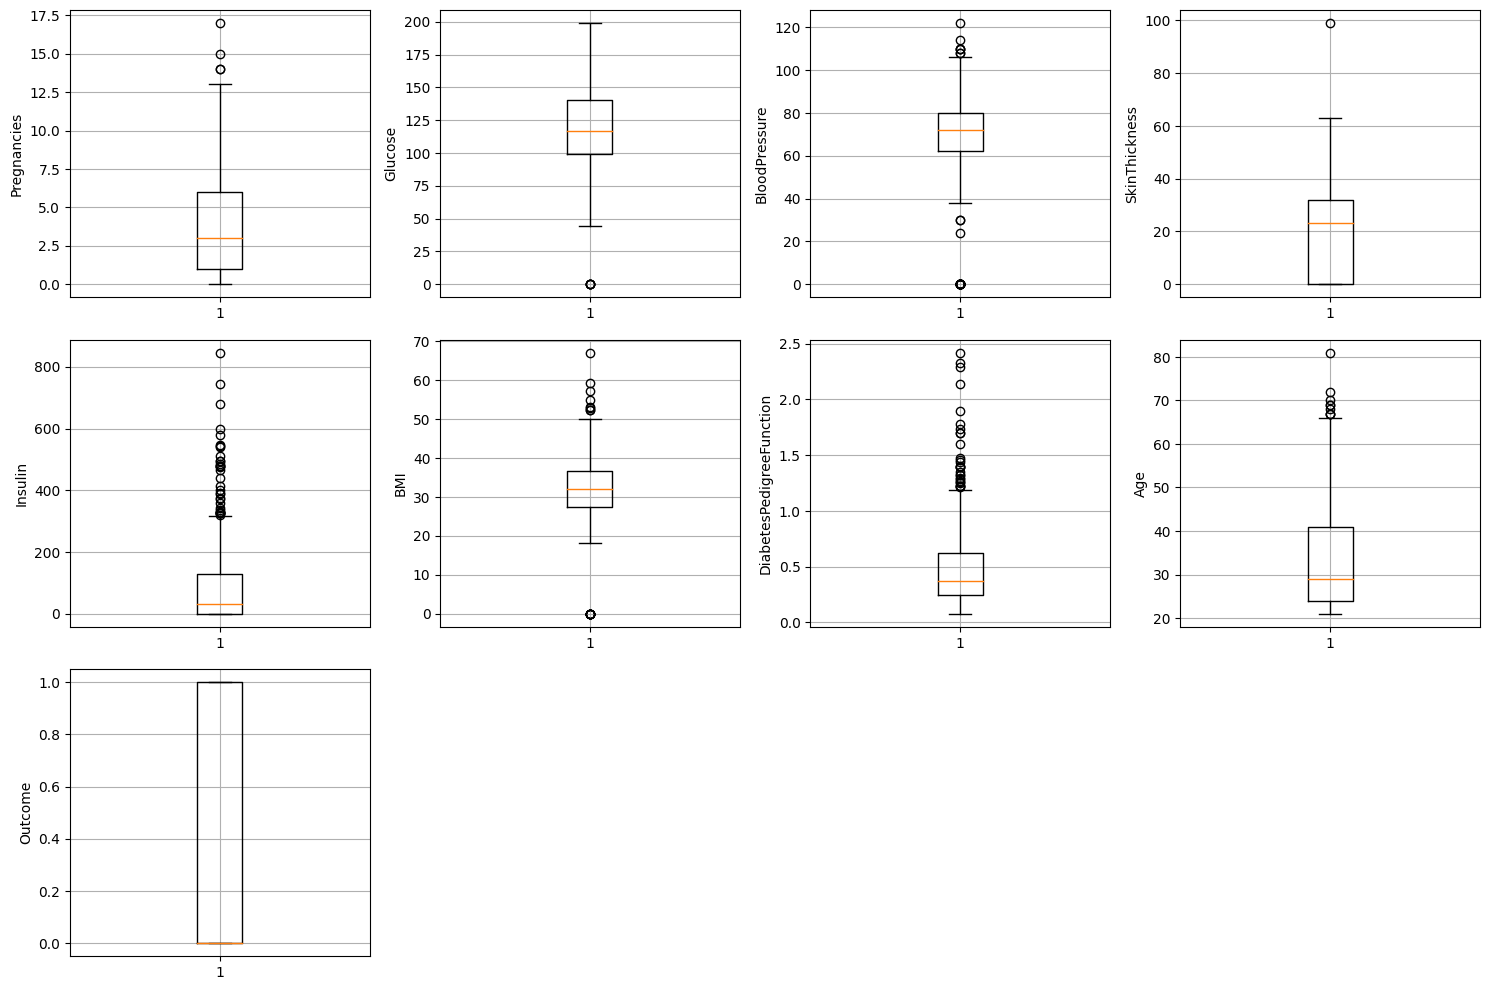

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
columnas = df.select_dtypes([np.number]).columns
n = 1
plt.figure(figsize=(15,10), dpi=100)
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  plt.ylabel(columna)
  plt.boxplot(df[columna])
  plt.grid(True)
  plt.tight_layout()

In [ ]:
columnas = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
for columna in columnas:
  Q1 = df[columna].quantile(0.25)
  Q3 = df[columna].quantile(0.75)
  IQR = Q3 - Q1
  filtroOutlierAbajo = df[columna] < (Q1 - 1.5 * IQR)
  filtroOutlierArriba = df[columna] > (Q3 + 1.5 * IQR)
  print(f"\nLímite inferior: {Q1 - 1.5 * IQR}")
  print(f"Límite Superior: {Q3 + 1.5 * IQR}")
  indicesALimpiarAbajo = df.loc[filtroOutlierAbajo].index
  indicesALimpiarArriba = df.loc[filtroOutlierArriba].index
  df.loc[indicesALimpiarAbajo, columna] = Q1 - 1.5 * IQR
  df.loc[indicesALimpiarArriba, columna] = Q3 + 1.5 * IQR

df.describe().round(3)


Límite inferior: -6.5
Límite Superior: 13.5

Límite inferior: 37.125
Límite Superior: 202.125

Límite inferior: 35.0
Límite Superior: 107.0

Límite inferior: -48.0
Límite Superior: 80.0

Límite inferior: -190.875
Límite Superior: 318.125

Límite inferior: 13.35
Límite Superior: 50.550000000000004

Límite inferior: -0.32999999999999996
Límite Superior: 1.2

Límite inferior: -1.5
Límite Superior: 66.5


<ipython-input-11-e45119be031f>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '13.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[indicesALimpiarArriba, columna] = Q3 + 1.5 * IQR
<ipython-input-11-e45119be031f>:12: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '37.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[indicesALimpiarAbajo, columna] = Q1 - 1.5 * IQR
<ipython-input-11-e45119be031f>:13: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '318.125' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[indicesALimpiarArriba, columna] = Q3 + 1.5 * IQR
<ipython-input-11-e45119be031f>:13: FutureWarning: Setting an item of incompatibl

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000,768.000
mean,3.837,121.136,70.685,20.512,73.653,32.125,0.459,33.200,0.349
std,3.344,31.187,14.197,15.845,93.576,7.050,0.286,11.628,0.477
min,0.000,37.125,35.000,0.000,0.000,13.350,0.078,21.000,0.000
25%,1.000,99.000,62.000,0.000,0.000,27.300,0.244,24.000,0.000
50%,3.000,117.000,72.000,23.000,30.500,32.000,0.372,29.000,0.000
75%,6.000,140.250,80.000,32.000,127.250,36.600,0.626,41.000,1.000
max,13.500,199.000,107.000,80.000,318.125,50.550,1.200,66.500,1.000


In [ ]:
# Eliminación de filas donde 'Insulin' es igual a '0'

df = df[df['Insulin'] != 0]
df.describe().round(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,394.000,394.000,394.000,394.000,394.000,394.000,394.000,394.000,394.000
mean,3.273,122.399,70.693,29.107,143.567,32.918,0.508,30.778,0.330
std,3.159,31.083,12.251,10.504,83.826,6.741,0.289,10.042,0.471
min,0.000,37.125,35.000,7.000,14.000,13.350,0.085,21.000,0.000
25%,1.000,99.000,62.000,21.000,76.250,28.325,0.270,23.000,0.000
50%,2.000,119.000,70.000,29.000,125.000,33.200,0.450,27.000,0.000
75%,5.000,143.000,78.000,36.750,190.000,37.075,0.687,36.000,1.000
max,13.500,198.000,107.000,63.000,318.125,50.550,1.200,66.500,1.000


Visualización del comportamiento de datos

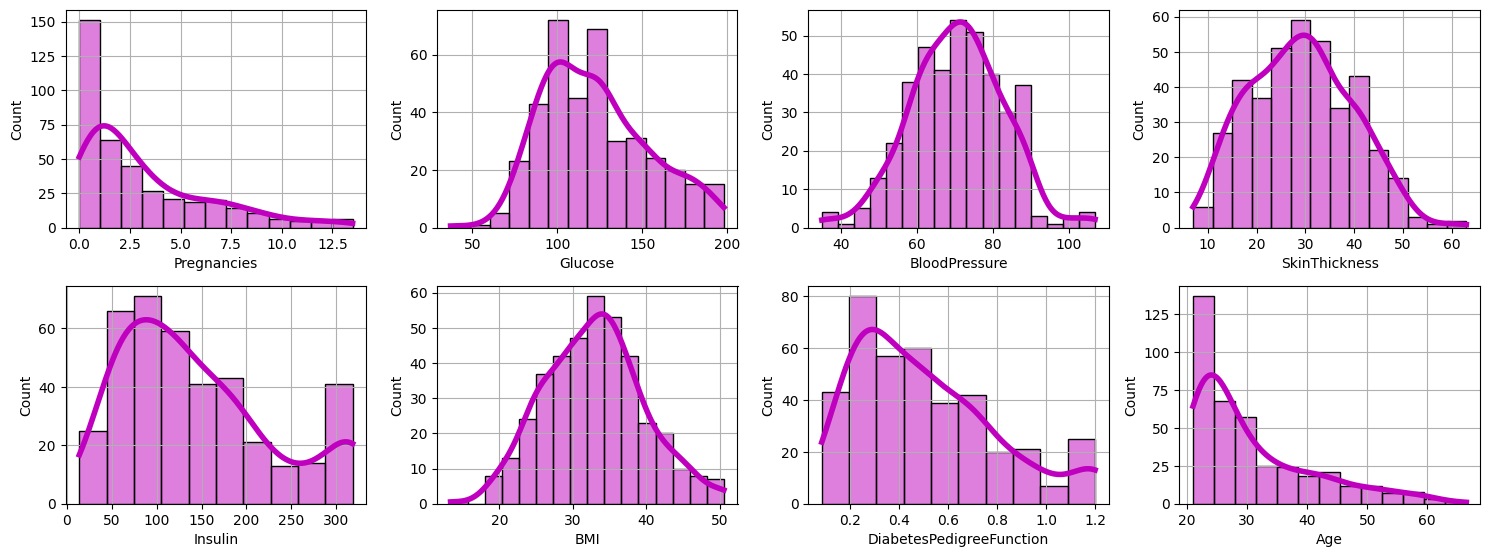

In [ ]:
columnas = df.select_dtypes(include=['float64', 'int']).columns
columnas = columnas.drop('Outcome')

n = 1
plt.figure(figsize=(15,8), dpi=100)
for columna in columnas:
  plt.subplot(3,4,n)
  n = n+1
  sns.histplot(df, x = columna, stat = 'count', kde=True, color= 'm', line_kws = {'linewidth': 4})
  plt.grid(True)
  plt.tight_layout()

Los datos presentan una distribución característica de cada tipo, es decir para 'Pregnancies' se tiene una tendencia creciente con baja tendencia en los valores altos.

Para el resto de las columnas se puede apreciar un comportamiento en forma de campana sin distribución sesgada ('Glucose', 'BloodPressure', 'SkinThickness'. 'BMI').

Para las colummnas 'Insulin', 'DiabetesPedigreeFunction' y 'Age' se presenta una distribución sesgada a la izquierda lo que es normal puesto que son características que presentan una tendencia creciente.



3. Diagnóstico y Selección de Problema:


Basándose en el EDA inicial, diagnosticar las principales características y desafíos de cada conjunto de datos.


Elegir una problemática específica para abordar (regresión, clasificación, clusterización, predicción).


Justificar la elección del problema y explicar por qué es relevante y desafiante.

**Modelos que se adaptan al dataset Diabetes:**

Al tratarse un problema de clasificación binaria los modelos aptos son:

Regresión Logística: Es muy efectivo para clasificación binaria lo que es muy útil para entender el riesgo de diabetes.

Árboles de Desición (Classifier): Es de gran aplicación para capturar relaciones no lineales entre las variables y las interacciones entre las características, por otra parte son fáciles de interpretar y visualizar.

Random Forest Classifier: El ensamblaje de árboles de decisión que reduce el sobreajuste y mejora la precisión mediante la combinación de múltiples árboles, es robusto frente a la varianza y tiene menor sensibilidad a las características no informativas.

